Gjennomsnittlig luxverdi for hvert hele stopp av blitsinnstillinger: 339.3, 399.1, 477.4, 577.7, 747.3, 1025.9
EV regnet fra kamerainstillingene: 11.6, 12.6, 13.6, 14.6, 15.6, 16.6


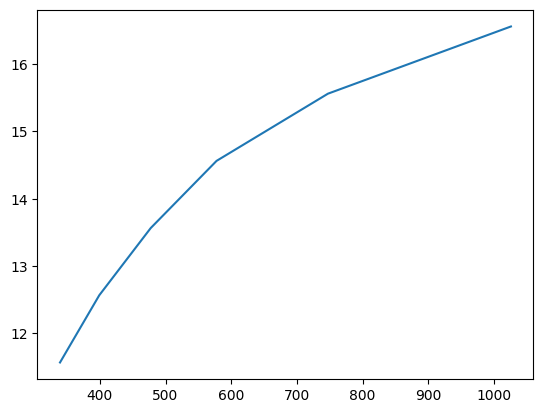

In [ ]:
# 1. test av luxsensor

import numpy as np

blitsstyrke = np.array([1/256, 1/128, 1/64, 1/32, 1/16, 1/8])

# luxmålinger for ulike blitsinnstillinger på 40 cm avstand
E = np.array([[334, 331, 343, 336, 347, 328, 318, 346, 350, 330, 348, 357, 344, 315, 363],
              [395, 393, 405, 403, 406, 388, 382, 406, 408, 412, 393, 394, 411, 399, 391],
              [469, 483, 478, 477, 472, 484, 476, 479, 469, 486, 481, 493, 466, 465, 483],
              [578, 563, 574, 569, 582, 580, 587, 582, 578, 587, 578, 589, 573, 569, 576],
              [761, 757, 734, 743, 742, 756, 748, 746, 759, 753, 749, 740, 734, 742, 745],
              [1025, 1018, 1033, 1014, 1033, 1029, 1025, 1027, 1024, 1037, 1025, 1032, 1018, 1019, 1029]])

# gjennomsnittlig lux for hvert nivå på blitsen:
Es = []
for i in range(len(E)):
    Es.append(round((np.mean(E[i])), 2))
print(f"Gjennomsnittlig luxverdi for hvert hele stopp av blitsinnstillinger: {Es[0]:.1f}, {Es[1]:.1f}, {Es[2]:.1f}, {Es[3]:.1f}, {Es[4]:.1f}, {Es[5]:.1f}")

# kamerainnstillinger under forsøket
N = 22
t = 1/200
S = np.array([3200, 1600, 800, 400, 200, 100])

# formel for å regne ut EV fra kamerainnstillinger
def EVs(N, t, S):
    return np.log2((N**2)/(t*(S/100)))

# utregningen:
EV = np.array([EVs(N, t, S[0]), EVs(N, t, S[1]),EVs(N, t, S[2]), EVs(N, t, S[3]), EVs(N, t, S[4]), EVs(N, t, S[5])])

print(f"EV regnet fra kamerainstillingene: {EV[0]:.1f}, {EV[1]:.1f}, {EV[2]:.1f}, {EV[3]:.1f}, {EV[4]:.1f}, {EV[5]:.1f}")

#plotter EV mot gjennomsnittlige luxverdier for å se etter en sammenheng
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(Es, EV)
plt.show()

# tviler på at EV = log2 ( E / C ) med C som en konstant, men ser for meg at jeg kan klare å finne en formel for sammenhengen mellom EV og E likevel

Logaritmisk modell: EV = 4.521185 * log(E) + -14.490967


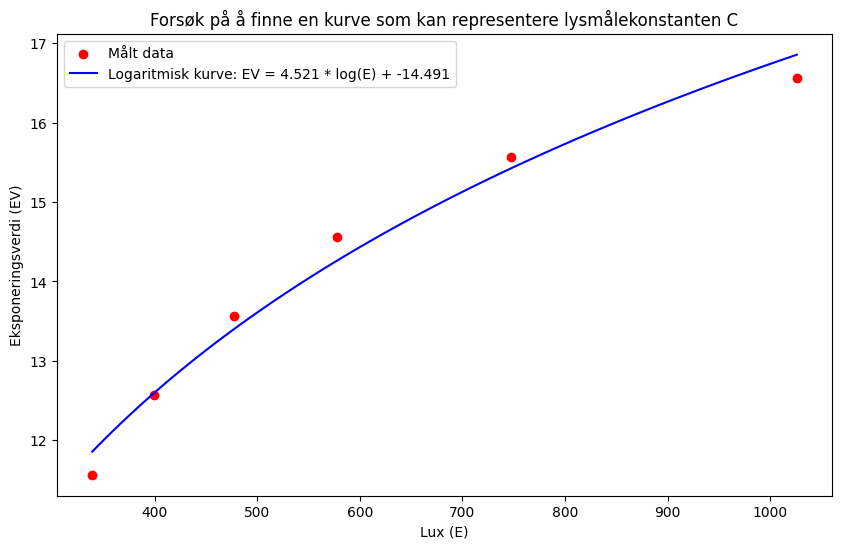

In [8]:
# 2. se etter en sammenheng

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definere logaritmisk modell: EV = a * log(E) + c
def log_modell(E, a, c):
    return a * np.log(E) + c

# Tilpasse den til målingene
params_log, covariance_log = curve_fit(log_modell, Es, EV)
a_log, c_log = params_log

# skriver ut modellen
print(f"Logaritmisk modell: EV = {a_log:.6f} * log(E) + {c_log:.6f}")

#plotter både målepunkter og estimert modell
E_fit = np.linspace(min(Es), max(Es), 100)
plt.figure(figsize=(10, 6))
plt.scatter(Es, EV, label="Målt data", color='red')
plt.plot(E_fit, log_modell(E_fit, *params_log), label=f"Logaritmisk kurve: EV = {a_log:.3f} * log(E) + {c_log:.3f}", color='blue')
plt.xlabel("Lux (E)")
plt.ylabel("Eksponeringsverdi (EV)")
plt.legend()
plt.title("Forsøk på å finne en kurve som kan representere lysmålekonstanten C")
plt.show()


In [ ]:
# Prøver å regne om fra lux til EV med formelen over for C

def EVc(E):
    return 4.521185 * np.log(E) + -14.490967


#lager in liste med eksempler på EV regnet utifra lux for å sjekke om det kan gi mening
EVluxexamples = []
for lux in range(100,1001,100):
    ev = EVc(lux)
    EVluxexamples.append(ev)

print(EVluxexamples)

#ser ut som om dette funker

[np.float64(6.329859367336573), np.float64(9.463706002876483), np.float64(11.296888767678498), np.float64(12.597552638416401), np.float64(13.606425915464937), np.float64(14.430735403218412), np.float64(15.127679144593214), np.float64(15.731399273956319), np.float64(16.263918168020425), np.float64(16.74027255100485)]


In [ ]:
# 3. Finne blenderinnstillinger fra valgt lukker, iso og målt lux:

import numpy as np

# 12 ulike verdier for hver innstilling, f = blender, l = lukkertid, i = iso
N = np.array([45, 32, 22, 16, 11, 8, 5.6, 4, 2.8, 2, 1.4, 1])
t = np.array([1/2000, 1/1000, 1/500, 1/250, 1/125, 1/60, 1/30, 1/15, 1/8, 1/4, 1/2, 1])
S = np.array([25, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 51200])

# EV fra innstillinger (blender = N, lukker = t, ISO = S):
def EVs(N, t, S):
    return np.log2((N**2)/(t*(S/100)))

# EV fra lux (E):
def EVc(E):
    return 4.521185 * np.log(E) + -14.490967

# toleranse for å regnes som ekvivalent EV
tolerance = 0.3

#inputverdier
velgt = 1/100
velgS = 200
luxmaal = 400
EVlux = EVc(luxmaal)

#bruker en for løkke til å finne riktig blender, for å få faktiske blenderverdier fra listen over. Kunne skrevet formel som regnet ut N, men ville da fått unøyaktige verdier.
for Nv in N:
    expcurr = EVs(Nv, velgt, velgS)
    if abs(EVlux - expcurr) < tolerance:
        blenderout = Nv

print(f"{luxmaal} Lux gir en EV på {EVlux:.2f}")
print(f"I kombinasjon med lukkertid 1/{round(1/velgt)} og iso {velgS} kan dette oppnås med blender: {blenderout}")

500 Lux gir en EV på 13.61
I kombinasjon med lukkertid 1/100 og iso 200 kan dette oppnås med blender: 16.0
